<a href="https://colab.research.google.com/github/nabisgithub/machine_learning/blob/main/%5B%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0%5D_ch3_3_%ED%8A%B9%EC%84%B1_%EA%B3%B5%ED%95%99%EA%B3%BC_%EB%AA%A8%EB%8D%B8_%EA%B7%9C%EC%A0%9C_230420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch3-3 특성 공학과 모델 규제

## Step 1. 데이터 준비하기

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

In [10]:
import numpy as np
perch_weight = np.array(  
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## Step 2. 사이킷런의 변환기

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [18]:
print(train_poly.shape)

(42, 9)


In [19]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

## Step 3. 다중 회귀 모델 훈련하기

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

LinearRegression()

In [22]:
print(lr.score(test_poly, test_target))

0.9714559911594111


In [30]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [31]:
print(train_poly.shape)

(42, 55)


## Step 4. 데이터 표준화

In [32]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## Step 5. 릿지

In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [39]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


In [41]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list :
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

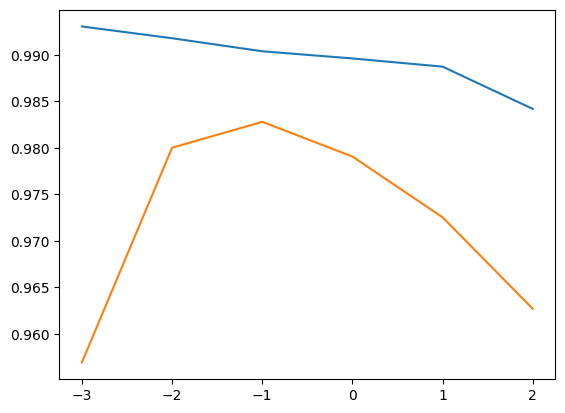

In [44]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [46]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


## Step 6. 라쏘

In [47]:
from sklearn.linear_model import Lasso

In [48]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


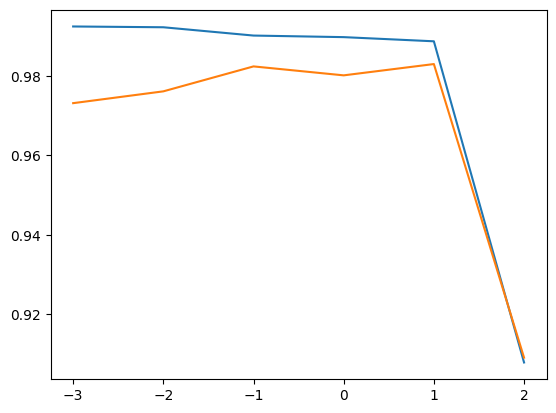

In [51]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list :
  lasso = Lasso(alpha=alpha, max_iter = 10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [52]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [53]:
print(np.sum(lasso.coef_==0))

40
